In [1]:
import psycopg2
import matplotlib.pyplot as plt

In [2]:
def requete():
    """fonction execute ma requete sql pour nb lettre par pays"""

    # connection a la BDD
    conn = psycopg2.connect(host = "localhost",
                                dbname = "santa_data",
                                user = "santa",
                                password = "claus",
                                port = 5432)

    # creation curseur
    cur = conn.cursor()

    cur.execute("""SELECT p.nom, COUNT(*) as nb
                        FROM lettre as l
                        INNER JOIN pays as p
                        ON l.code_pays = p.code
                        GROUP BY code;
                    ;""")


    pays_nbLettre = cur.fetchall()
    #print(pays_nbLettre)

    cur.close()

    conn.close()
    
    return pays_nbLettre

In [3]:
nbparpays = requete()
grospays = [p[0] for p in nbparpays if p[1]>100]
grosnb = [p[1] for p in nbparpays if p[1]>100]

petitpays = [p[0] for p in nbparpays if p[1]<=100]
petitnb = [p[1] for p in nbparpays if p[1]<=100]

In [4]:
total = 0
total += sum(grosnb)+ sum(petitnb)
nbsans = 1637 - total
if nbsans >0:
    if nbsans > 100:
        grospays.append("Non renseigné")
        grosnb.append(nbsans)
    else:
        petitpays.append("Non renseigné")
        petitnb.append(nbsans)

In [5]:
if len(petitpays)>0:
    grospays.append("Autres")
    grosnb.append(sum(petitnb))

grosprop = [round(x*100/1637,2) for x in grosnb]
petitprop = [round(x*100/sum(petitnb),2) for x in petitnb]

['France', 'Canada', 'Autres']

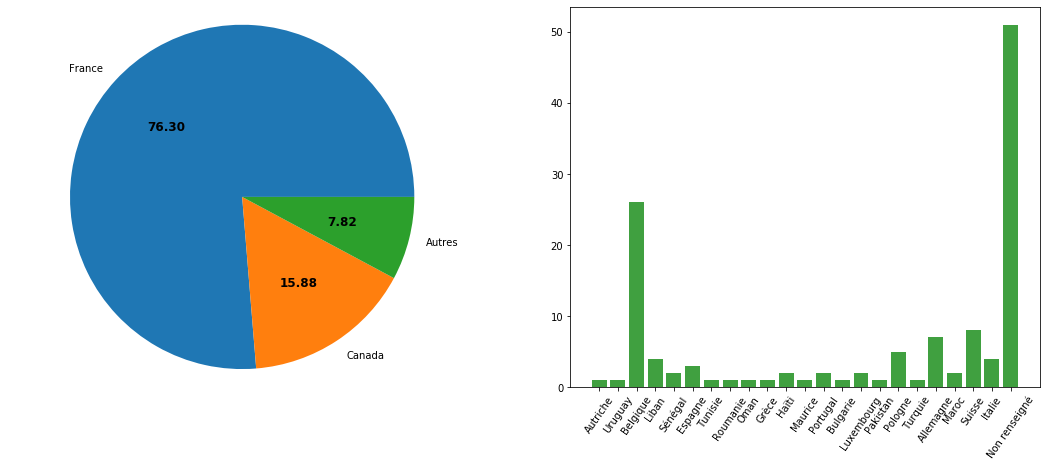

In [24]:
figureObject, (axesObject,axes2) = plt.subplots(ncols=2)


wedges, texts, autotexts = axesObject.pie(grosprop,

        labels = grospays,

        autopct = '%1.2f',

        startangle = 0,
        textprops=dict(color="k"))

plt.setp(autotexts, size=12, weight="bold")

axesObject.axis('equal')

axes2.bar(petitpays,petitnb,  facecolor='g', alpha=0.75)

fig = plt.gcf()
fig.set_size_inches(18.5, 7.0)
plt.xticks(rotation=55)

plt.show()